In [1]:
import pandas as pd
import numpy as np
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namyoungjik","key":"e3af1b3cc4881e1414b9d367a18ed0c7"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle competitions download -c bike-sharing-demand

100% 189k/189k [00:00<00:00, 390kB/s]
100% 189k/189k [00:00<00:00, 390kB/s]


In [5]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
submission = pd.read_csv('sampleSubmission.csv')

In [10]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [13]:
train['datetime'][100]

'2011-01-05 09:00:00'

In [14]:
train['datetime'][100].split()

['2011-01-05', '09:00:00']

In [15]:
print(train['datetime'][100].split()[0])

print(train['datetime'][100].split()[1])


2011-01-05
09:00:00


In [16]:
train['datetime'][100].split()[0]

train['datetime'][100].split()[0].split('-')

print(train['datetime'][100].split()[0].split('-')[0])
print(train['datetime'][100].split()[0].split('-')[1])
print(train['datetime'][100].split()[0].split('-')[2])


2011
01
05


In [17]:
train['datetime'][100].split()[1]

train['datetime'][100].split()[1].split(':')

print(train['datetime'][100].split()[1].split(':')[0])
print(train['datetime'][100].split()[1].split(':')[1])
print(train['datetime'][100].split()[1].split(':')[2])

09
00
00


In [18]:
# 날짜 요소 분리
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])

# 시간 요소 분리
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [19]:
from datetime import datetime
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d'))

#정수로 요일 변환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())

#문자열로 요일 변환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])


2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [20]:
train['weekday'] = train['date'].apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [21]:
train['weekday']

,weekday
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday
...,...
10881,Wednesday
10882,Wednesday
10883,Wednesday
10884,Wednesday


In [22]:
# 'season' 열 매핑
train['season'] = train['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# 'weather' 열 매핑
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

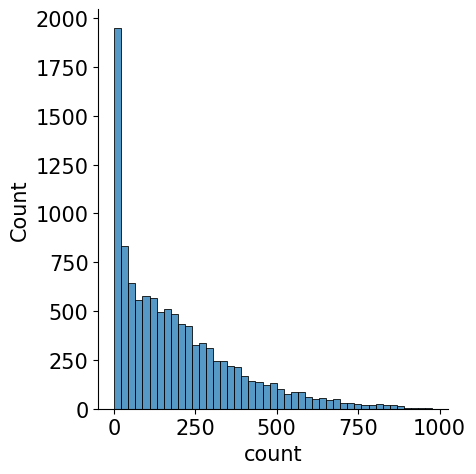

In [25]:
mpl.rc('font', size = 15)
sns.displot(train['count'])

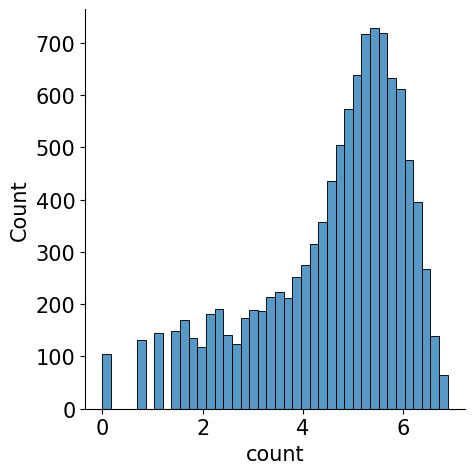

In [26]:
sns.displot(np.log(train['count']))

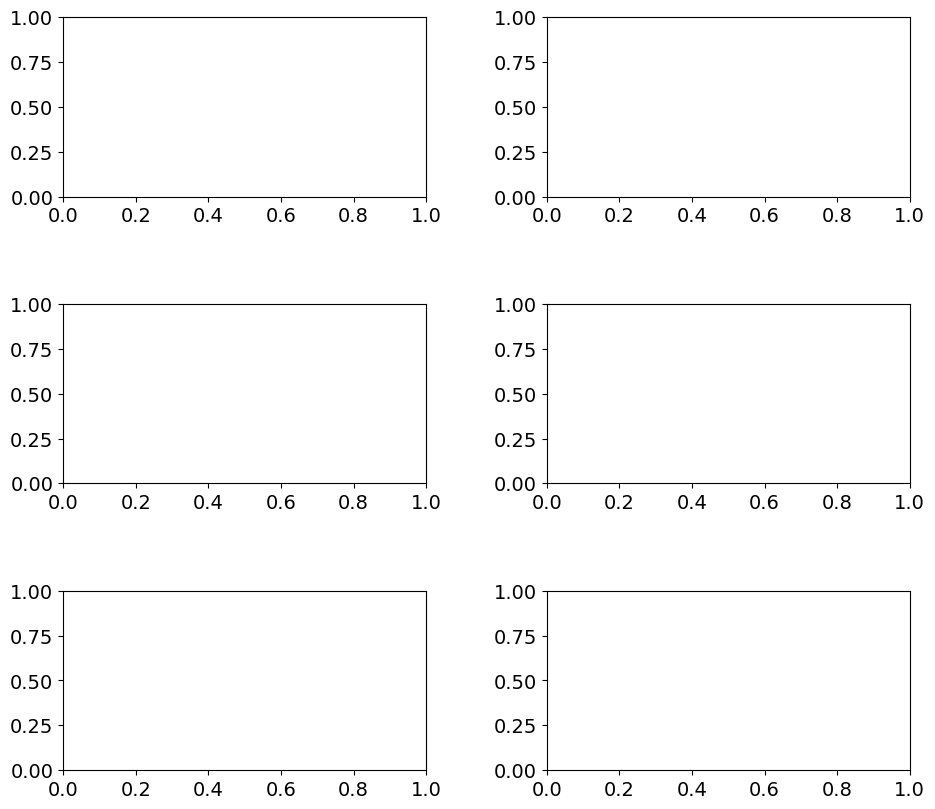

In [27]:
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)

figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()

figure.set_size_inches(10, 9)

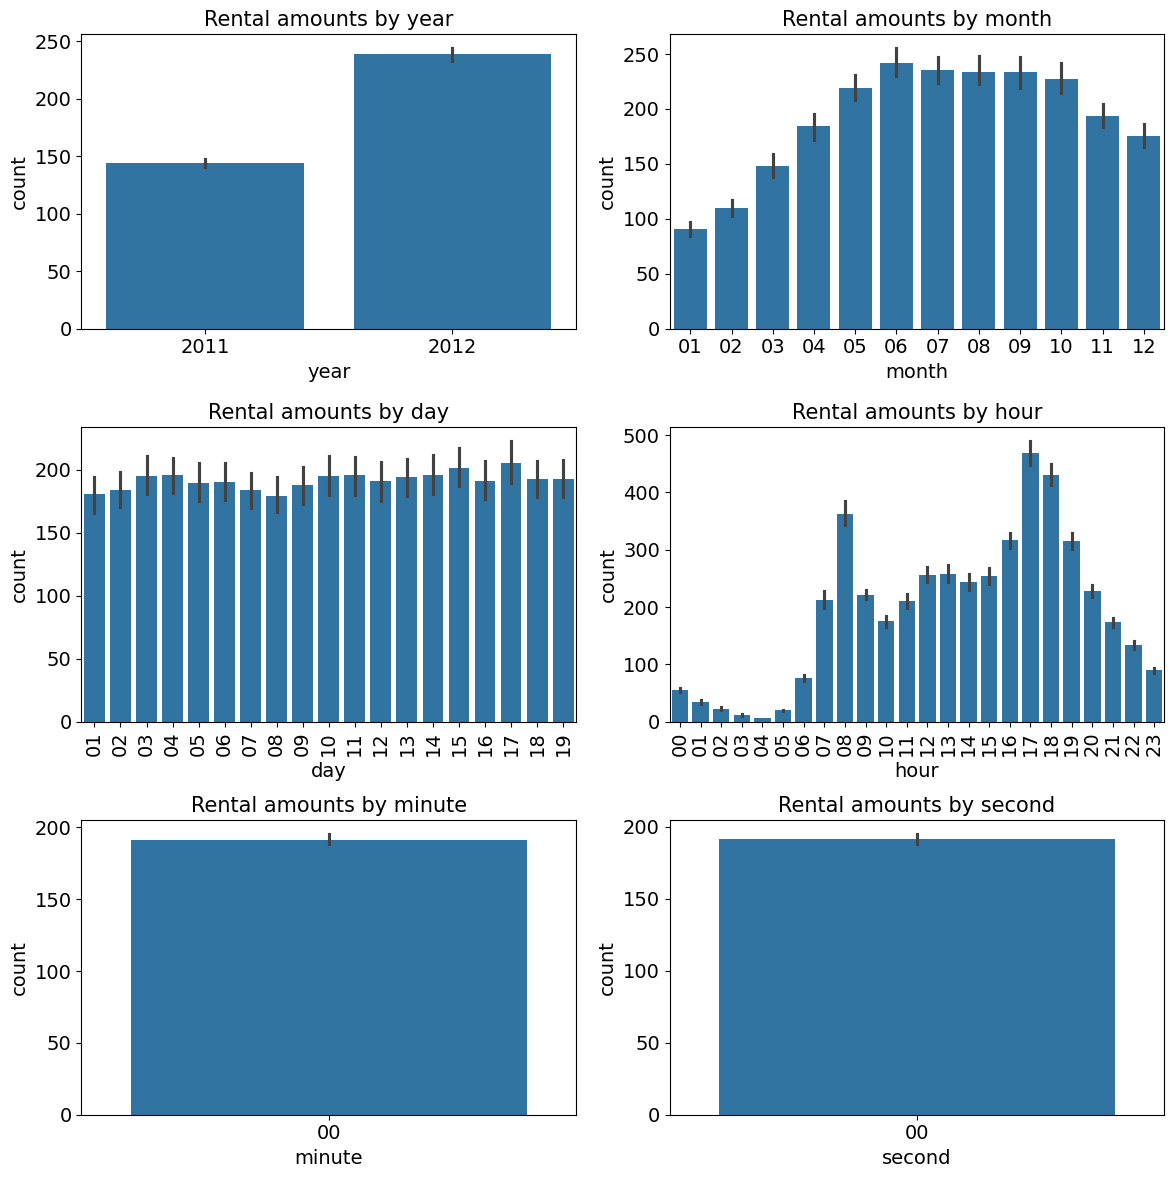

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.barplot(x='year', y='count' , data=train, ax=axes[0,0])
sns.barplot(x='month', y='count' , data=train, ax=axes[0,1])
sns.barplot(x='day', y='count' , data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count' , data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count' , data=train, ax=axes[2,0])
sns.barplot(x='second', y='count' , data=train, ax=axes[2,1])

# plt.show()

axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

plt.tight_layout()

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

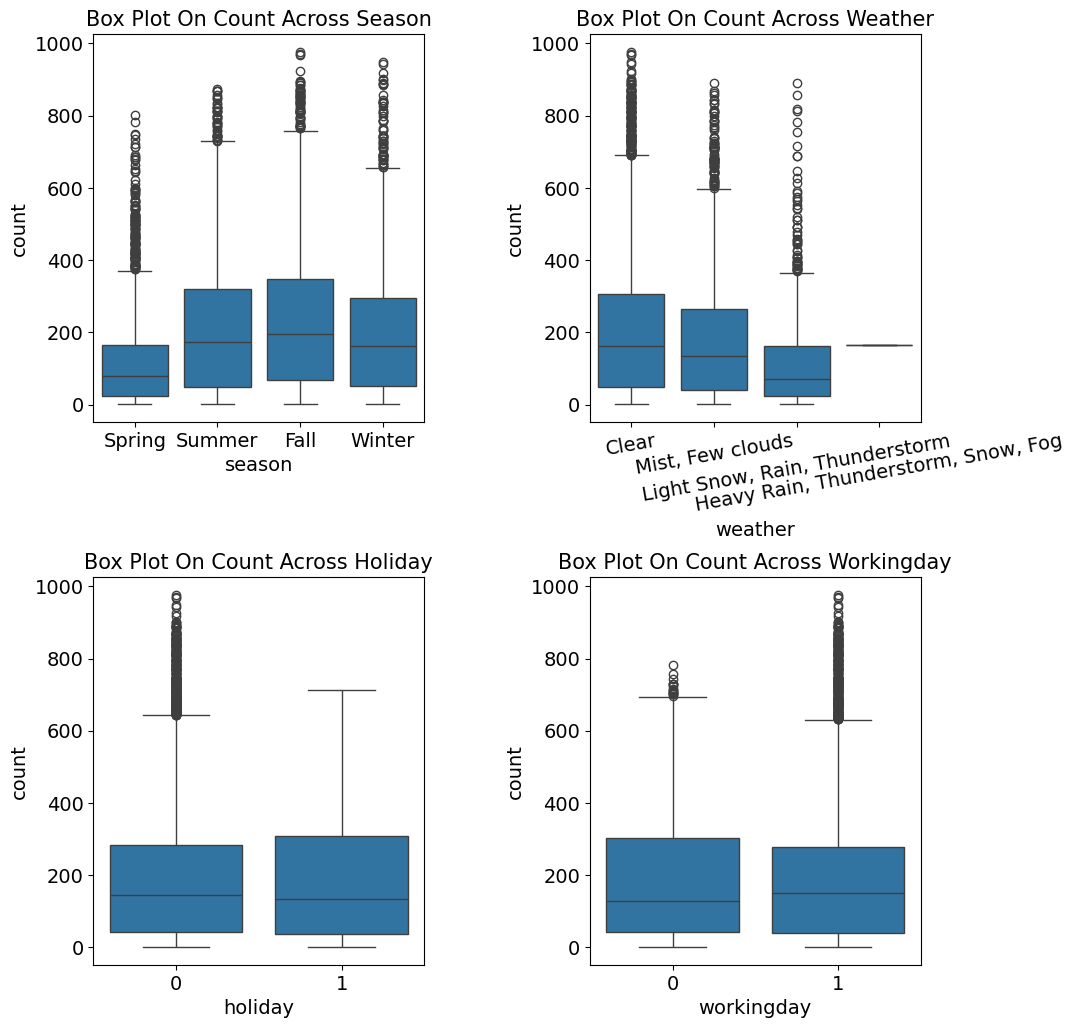

In [29]:
# 1. m행 n열 figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

# 2. 서브플롯 할당
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

# 3-1. 서브플롯에 제목 달기
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Workingday')

# 3-2. x축 라벨 겹침 해결
axes[0,1].tick_params(axis='x', labelrotation=10)

plt.subplots_adjust(bottom=0.01, wspace=0.5, hspace=0.4)

<Axes: xlabel='hour', ylabel='count'>

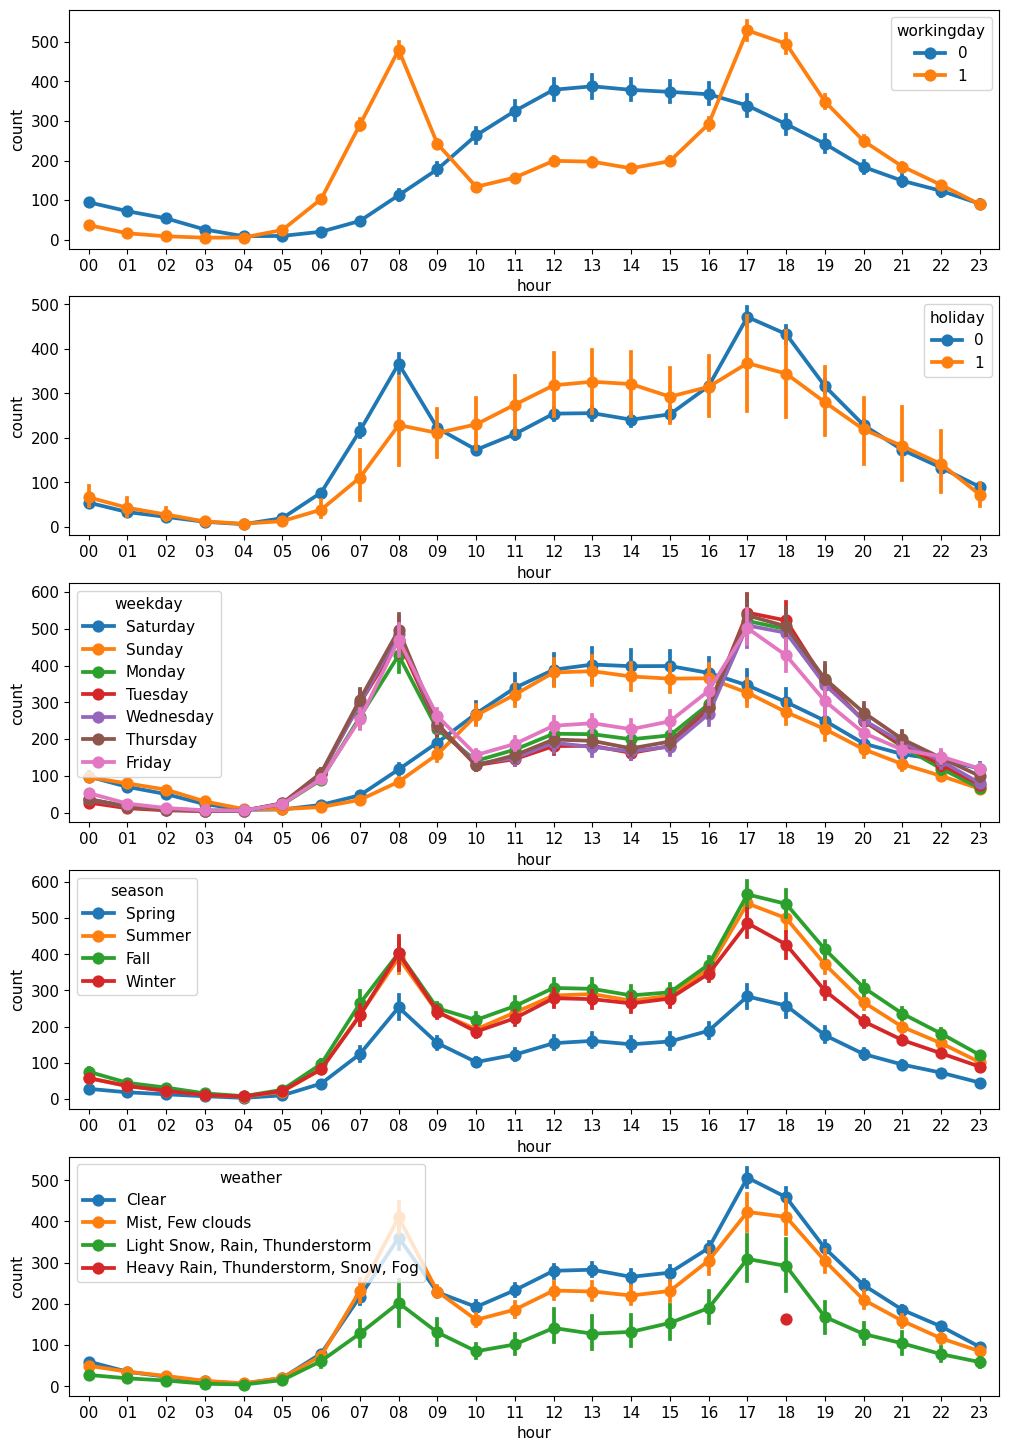

In [30]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

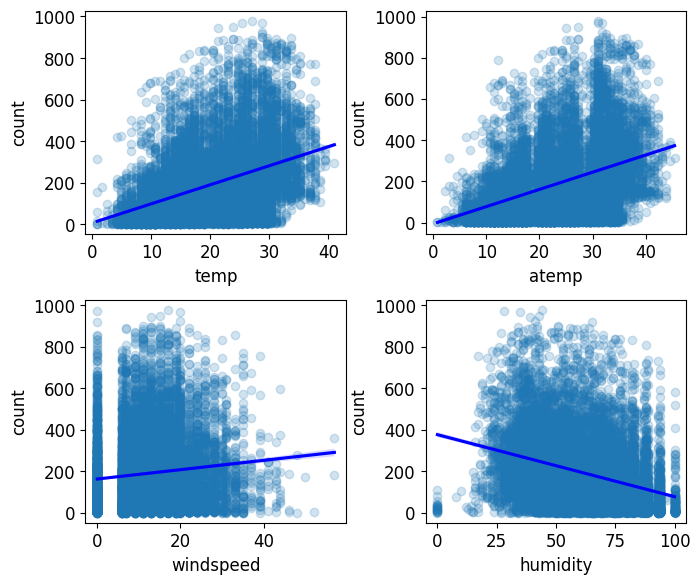

In [31]:
# 산점도
mpl.rc('font', size=12)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [32]:
# 'windspeed' 열의 값과 그 빈도 계산
windspeed_counts = train['windspeed'].value_counts()
print(windspeed_counts)

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64


In [33]:
# 히트맵
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatamp of Numerical Data')]

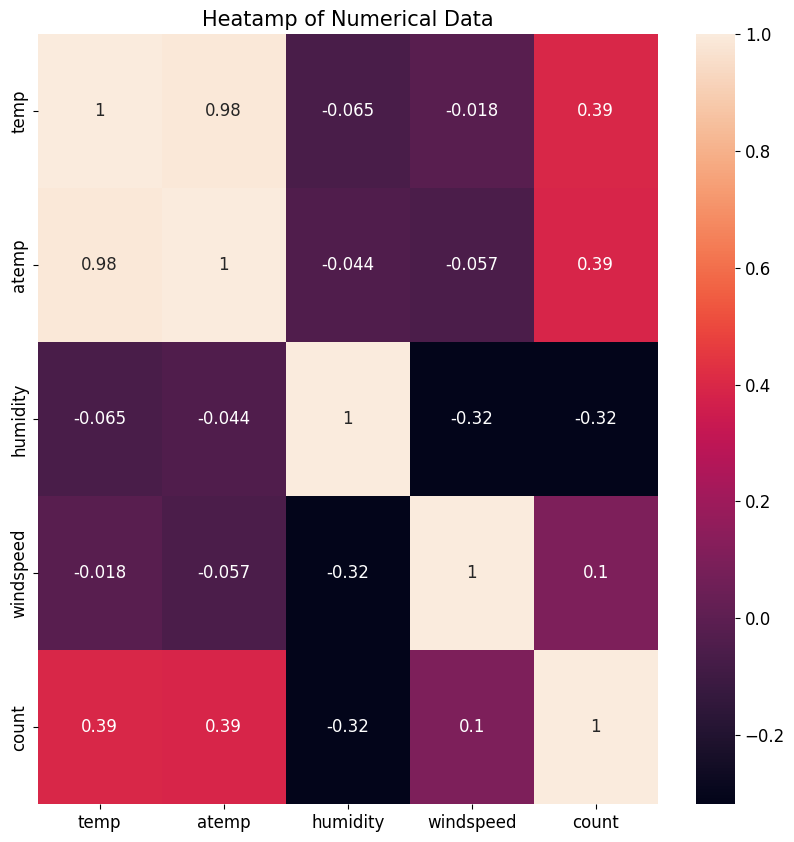

In [34]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ex = plt.subplots()
fig.set_size_inches(10, 10)

sns.heatmap(corrMat, annot=True)
ex.set(title='Heatamp of Numerical Data')

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [36]:
train = train[train['weather']!=4]

In [37]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [38]:
from datetime import datetime

# 날짜
all_data['date'] = all_data['datetime'].apply(lambda x : x.split()[0])

# 년도
all_data['year'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[0])

# 월
all_data['month'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[1])

# 시
all_data['hour'] = all_data['datetime'].apply(lambda x : x.split()[1].split(':')[0])

# 요일
all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").weekday())

In [39]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

In [40]:
all_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,00,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,02,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,03,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,04,5


In [41]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

In [42]:
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

In [43]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


In [44]:
# 평가지표 계산 함수 작성

import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    #지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    #RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [45]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [46]:
log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y)

LinearRegression()

In [47]:
preds = linear_reg_model.predict(X_train)

In [48]:
print(f'선형 회귀의 값: {rmsle(log_y, preds, True):.4f}')

선형 회귀의 값: 1.0205


In [49]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

In [50]:
# 릿지 모델
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [51]:
ridge_params = {'max_iter' : [3000], 'alpha' : [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, # 릿지 모델
                                      param_grid = ridge_params, # 값 목록
                                      scoring = rmsle_scorer, # 평가지표
                                      cv = 5) # 교차 검증 분할 수

In [52]:
log_y = np.log(y) # 타깃값 로그 변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [53]:
print('최적 하이퍼파라미터 : ', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.1, 'max_iter': 3000}


In [54]:
#예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 1.0205


In [55]:
# 라쏘 회귀 모델
from sklearn.linear_model import Lasso

lasso_model = Lasso()

# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])

lasso_params = {'max_iter' : [3000], 'alpha' : lasso_alpha}

#그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid = lasso_params,
                                      scoring = rmsle_scorer,
                                      cv = 5)

#그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 : ', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.1, 'max_iter': 3000}


In [56]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


In [57]:
# 랜덤 포레스트 회귀 모델
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()

rf_params = {'random_state' :[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid = rf_params,
                                              scoring = rmsle_scorer,
                                              cv = 5)

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print(f'최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [58]:
# 최적 모델로 예측 수행
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# RMSLE 값 출력
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


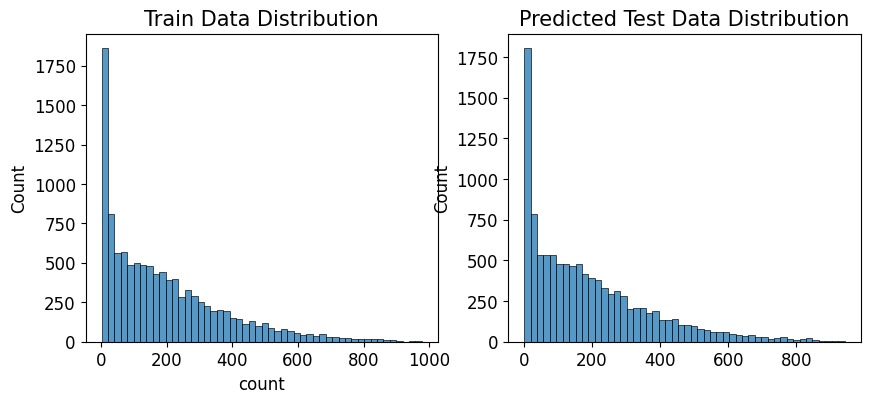

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins = 50, ax = axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [60]:
# 테스트 데이터셋을 사용하여 예측 수행
randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

# 예측 결과를 제출용 데이터프레임에 할당 (지수 변환 수행)
submission['count'] = np.exp(randomforest_preds)

# 예측 결과를 CSV 파일로 저장
submission.to_csv('submission.csv', index=False)

In [61]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email 'jik970401@gmail.com'
!git config --global user.name 'jikyoung'

Mounted at /content/drive


In [65]:
cd /content/drive/MyDrive/캐글_데이콘_코드/Kaggle-Dacon

/content/drive/MyDrive/캐글_데이콘_코드/Kaggle-Dacon


In [66]:
!git add bike_sharing_demand.ipynb

In [67]:
!git commit -m 'Predicting Bicycle Demand Using Multiple Models'
!git push

[main 3a2cc36] Predicting Bicycle Demand Using Multiple Models
 1 file changed, 1 insertion(+)
 create mode 100644 bike_sharing_demand.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 817.85 KiB | 7.30 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/jikyoung/Kaggle-Dacon.git
   2dd109b..3a2cc36  main -> main
